In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Import Data
data_exp = pd.read_csv("A4 Set B - Combined Datasheet.csv")
data_ver = pd.read_csv("csv-export.csv")

In [26]:
print(data_exp.columns)

Index(['Element', 'Spectral line Rank', 'theta_left', 'theta_right', 'd_theta',
       'Order', 'lambda_left', 'lambda_right'],
      dtype='object')


## Data Exploration

In [27]:
print(data_exp.describe())
print(data_ver.describe())

       Spectral line Rank  theta_left  theta_right    d_theta      Order  \
count           37.000000   37.000000    37.000000  37.000000  37.000000   
mean             4.027027    3.488288     3.560360   0.382883   1.081081   
std              2.339118    0.985245     0.939286   0.143882   0.276725   
min              1.000000    2.483333     2.216667   0.150000   1.000000   
25%              2.000000    2.950000     3.083333   0.250000   1.000000   
50%              4.000000    3.333333     3.466667   0.366667   1.000000   
75%              6.000000    3.666667     3.833333   0.450000   1.000000   
max              9.000000    7.916667     7.333333   0.750000   2.000000   

       lambda_left  lambda_right  
count    37.000000     37.000000  
mean    564.405282    578.339244  
std      76.379342     92.952594  
min     421.287826    386.784813  
25%     511.739628    508.834536  
50%     561.119373    581.448289  
75%     627.905195    654.031292  
max     697.564737    743.985754  


In [28]:
print(data_exp)

     Element  Spectral line Rank  theta_left  theta_right   d_theta  Order  \
0   Hydrogen                   1    3.000000     2.250000  0.750000      1   
1   Hydrogen                   2    2.916667     2.500000  0.416667      1   
2   Hydrogen                   3    3.916667     3.500000  0.416667      1   
3   Hydrogen                   1    4.833333     5.250000  0.416667      2   
4   Hydrogen                   2    5.916667     5.500000  0.416667      2   
5   Hydrogen                   3    7.916667     7.333333  0.583333      2   
6     Helium                   1    2.883333     2.216667  0.666667      1   
7     Helium                   2    2.950000     2.500000  0.450000      1   
8     Helium                   3    3.000000     2.750000  0.250000      1   
9     Helium                   4    3.166667     2.916667  0.250000      1   
10    Helium                   5    3.366667     3.000000  0.366667      1   
11    Helium                   6    3.500000     3.183333  0.316

In [6]:
# sns.pairplot(data_ver)

## Experimental Data Analysis

In [7]:
print(data_exp.columns)

Index(['Element', 'Spectral line Rank', 'theta_left', 'theta_right', 'd_theta',
       'Order', 'lambda_left', 'lambda_right'],
      dtype='object')


In [33]:
# Calculate Uncertainty
data_exp["lambda_unc"] = np.sin(data_exp["d_theta"]*np.pi/180)*((1/100)*(1/1000))*(1000000000)
data_exp["mean_lambda"] = (data_exp["lambda_left"] + data_exp["lambda_right"])/2

In [69]:
print(data_exp["lambda_unc"])

0     130.895956
1      72.721411
2      72.721411
3      72.721411
4      72.721411
5     101.809114
6     116.352658
7      78.539009
8      43.633093
9      43.633093
10     63.994969
11     55.268478
12     46.541945
13     61.086144
14     43.633093
15    104.717841
16     95.991635
17     93.082883
18     43.633093
19     84.356580
20     87.265355
21    101.809114
22     78.539009
23     29.088780
24     49.450794
25     26.179909
26     66.903789
27     43.633093
28     43.633093
29     66.903789
30     63.994969
31     72.721411
32     58.177314
33     63.994969
34     49.450794
35     29.088780
36     43.633093
Name: lambda_unc, dtype: float64


In [40]:
# filtered_df = df[(df['element'] == 'Hydrogen') & (df['order'] == 1)]

f_exp_by_elements = {}
for E in ["Hydrogen", "Nitrogen", "Helium", "Neon"]:
    f_exp_by_elements[f"{E}"] = data_exp[(data_exp["Element"] == E) & (data_exp["Order"] == 1)]

## Vernier Data Analysis

In [42]:
# Plotting Stuff
def plot_spectral(x, y, element):
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(12, 6))

    sns.lineplot(
        x=x, 
        y=y, 
        label=f"{element} Spectrum", 
        color="blue",
        linewidth=2.5
    )
    plt.xlabel("Wavelength (nm)", fontsize=14)
    plt.ylabel("Intensity", fontsize=14)
    plt.title(f"{element} Spectral Line Data", fontsize=16, fontweight="bold")

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.legend(fontsize=12)

    plt.show()
    
def remove_noise(noise_intensity, noise_wavelength, element_intensity, element_wavelength, element):

    element_df = pd.DataFrame({'Wavelength': element_wavelength, f'{element}_Intensity': element_intensity})
    noise_df = pd.DataFrame({'Wavelength': noise_wavelength, 'Noise_Intensity': noise_intensity})

    merged_df = pd.merge(element_df, noise_df, on='Wavelength', how='left').fillna(0)

    merged_df['Corrected_Intensity'] = merged_df[f'{element}_Intensity'] - merged_df['Noise_Intensity']

    merged_df['Corrected_Intensity'] = np.maximum(merged_df['Corrected_Intensity'], 0)

    return merged_df[['Wavelength', 'Corrected_Intensity']]


In [43]:
# data_ver
# Remove Absorbance
cols_to_drop = [col for col in data_ver.columns if "Absorbance" in col]

# Drop the columns from the DataFrame
data_ver_cleaned = data_ver.drop(columns=cols_to_drop)
print(data_ver_cleaned.columns)

Index(['Hydrogen:Wavelength(nm)', 'Hydrogen:Raw', 'Noise:Wavelength(nm)',
       'Noise:Raw', 'Nitrogen:Wavelength(nm)', 'Nitrogen:Raw',
       'Helium:Wavelength(nm)', 'Helium:Raw', 'Mercury:Wavelength(nm)',
       'Mercury:Raw', 'Neon:Wavelength(nm)', 'Neon:Raw', 'CO2:Wavelength(nm)',
       'CO2:Raw', 'Data Set 8:Wavelength(nm)', 'Data Set 8:Raw'],
      dtype='object')


In [44]:
# Clean Elements
Elements = ["Hydrogen", "Nitrogen", "Helium", "Neon"]
cleaned_elements = {}
for E in Elements:
    cleaned_elements[f"{E}"] = remove_noise(data_ver_cleaned["Noise:Raw"], data_ver_cleaned["Noise:Wavelength(nm)"], data_ver_cleaned[f"{E}:Raw"], data_ver_cleaned[f"{E}:Wavelength(nm)"], E)

In [12]:
# # Plot Spectral lines
# for E in Elements:
#     plot_spectral(cleaned_elements[f"{E}"]["Wavelength"], cleaned_elements[f"{E}"]["Corrected_Intensity"], E)

In [78]:
# Find peaks
from scipy.signal import find_peaks
def find_and_plot_peaks(wavelength, intensity, element, wl_exp, unc):
    peak_wavelength = wavelength[np.argmax(intensity)]
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength, intensity, label="Intensity", color="black")
    plt.axvline(x=peak_wavelength, color='red', linestyle='--', alpha=0.7, label = f"Peak Intensity: {peak_wavelength} nm")
    print(type(unc))
    for i, wl in enumerate(wl_exp):
        wl_left = wl - unc.iloc[i] / 2
        wl_right = wl + unc.iloc[i] / 2

        # Shade uncertainty region in x-axis
        plt.fill_betweenx(y=[min(intensity), max(intensity)], x1=wl_left, x2=wl_right, color="green", alpha=0.1)

        # Plot expected wavelength center
        plt.axvline(x=wl, color="blue", linestyle='--', alpha=0.7, label=f"Band {i+1}: {wl:.2f} nm ± {unc.iloc[i]/2:.2f} nm")
    plt.xlabel("Wavelength")
    plt.ylabel("Intensity")
    plt.title(f"Intensity vs Wavelength with Detected Peaks ({element})")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return peak_wavelength

<class 'pandas.core.series.Series'>


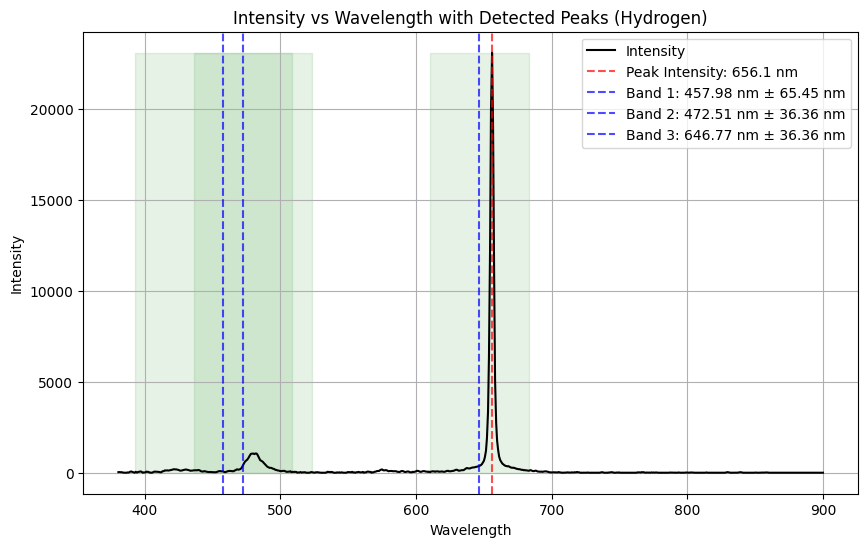

<class 'pandas.core.series.Series'>


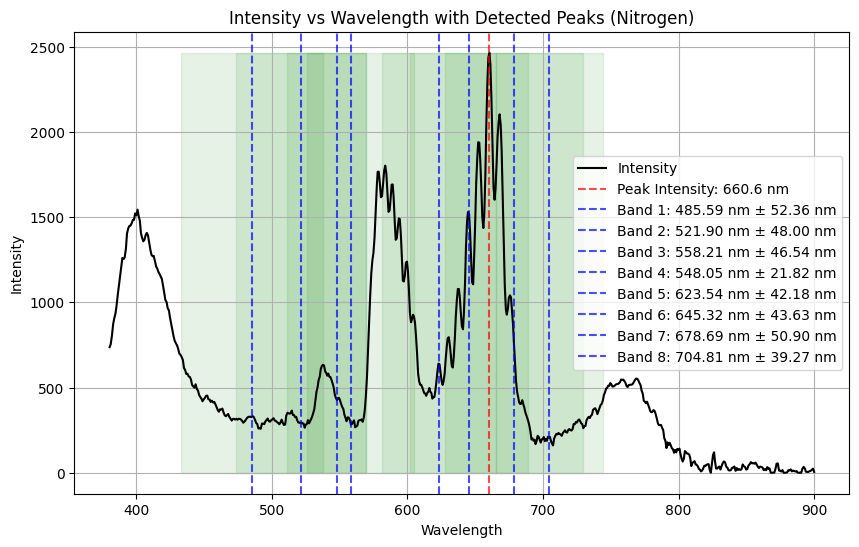

<class 'pandas.core.series.Series'>


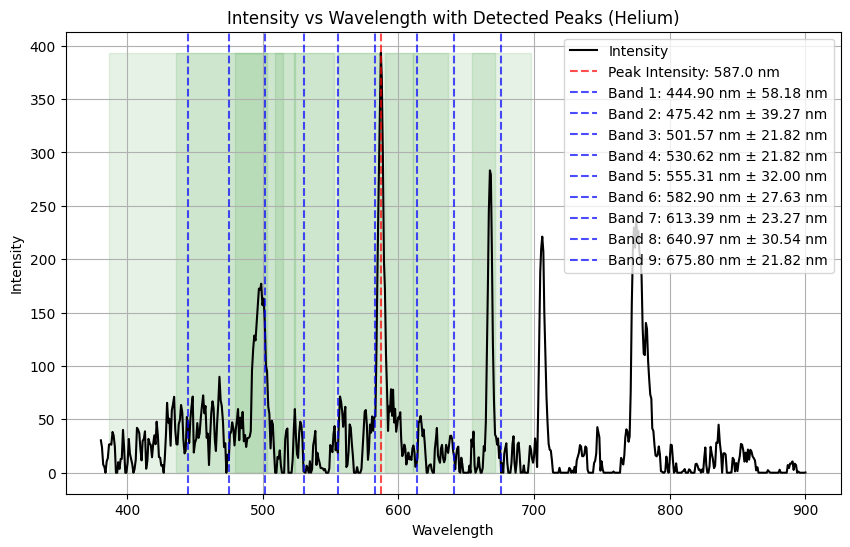

<class 'pandas.core.series.Series'>


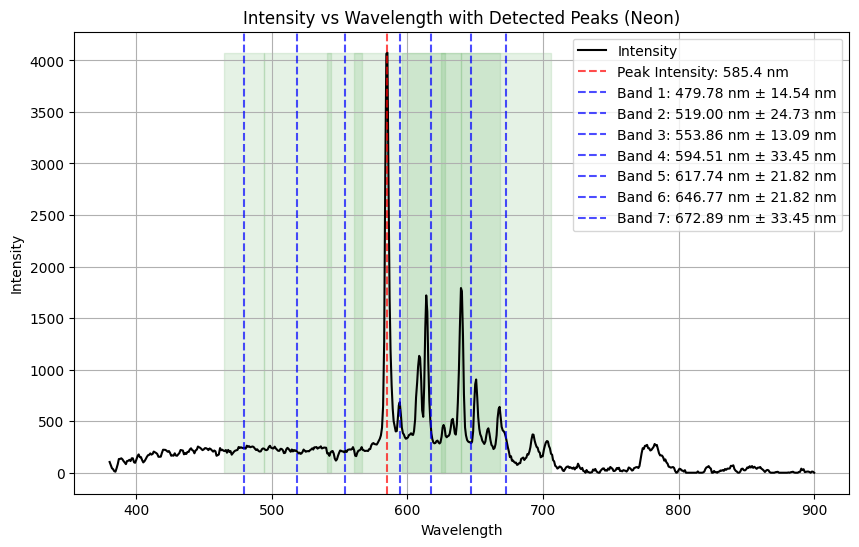

In [79]:
# Plot Spectral lines
for E in Elements:
    find_and_plot_peaks(cleaned_elements[f"{E}"]["Wavelength"], cleaned_elements[f"{E}"]["Corrected_Intensity"], E, f_exp_by_elements[f"{E}"]["mean_lambda"], f_exp_by_elements[f"{E}"]["lambda_unc"])

## Retrieve Data from NIST

In [15]:
import requests
from bs4 import BeautifulSoup
import io
site = "https://physics.nist.gov/cgi-bin/ASD/lines1.pl?spectra={}" \
               "&limits_type=0&low_w={}" \
               "&upp_w={}" \
               "&unit=1&submit=Retrieve+Data&de=0&format=3&line_out=0&remove_js=on&en_unit=0&output=0&bibrefs=1&page_size=15&show_obs_wl=1&show_calc_wl=1&unc_out=1&order_out=0&max_low_enrg=&show_av=2&max_upp_enrg=&tsb_value=0&min_str=&A_out=1&intens_out=on&max_str=&allowed_out=1&forbid_out=1&min_accur=&min_intens=&conf_out=on&term_out=on&enrg_out=on&J_out=on"

site = site.format("H", 200, 900)
respond = requests.get(site)
soup = BeautifulSoup(respond.content, 'lxml')
html_data = soup.get_text()
html_data = html_data.replace('"', "")
data = io.StringIO(html_data)
df_NIST = pd.read_csv(data, sep="\t")
print(df_NIST)

     obs_wl_air(nm)  unc_obs_wl  ritz_wl_air(nm)  unc_ritz_wl  intens  \
0               NaN         NaN        365.51234      0.00013     NaN   
1               NaN         NaN        365.55993      0.00013     NaN   
2               NaN         NaN        365.61134      0.00013     NaN   
3           365.665       0.003        365.66698      0.00019     700   
4           365.725       0.003        365.72735      0.00019     700   
..              ...         ...              ...          ...     ...   
183         854.538       0.003        854.53830      0.00060  (1400)   
184         859.839       0.003        859.83920      0.00060    2300   
185         866.502       0.003        866.50180      0.00060  (2200)   
186         875.046       0.003        875.04720      0.00050    2200   
187         886.289       0.010        886.27830      0.00060  (3600)   

      gA(s^-1)  Acc   Ei(cm-1)       Ek(cm-1) conf_i term_i  J_i conf_k  \
0     215880.0  AAA  82259.158  [109610.2232]   

In [19]:
# Clean Dataset
df_cleaned_na_NIST = df_NIST.dropna(subset=['obs_wl_air(nm)'])
# Function to clean and convert column C to numbers
def clean_intensity(value):
    if isinstance(value, str):  
        value = value.replace("(", "").replace(")", "")  # Remove parentheses
        value = ''.join(filter(str.isdigit, value))  # Keep only digits
    return pd.to_numeric(value, errors='coerce')  # Conver

In [20]:
df_cleaned_na_NIST["intens"] = df_cleaned_na_NIST["intens"].apply(clean_intensity)

/tmp/ipykernel_9976/2875505087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_na_NIST["intens"] = df_cleaned_na_NIST["intens"].apply(clean_intensity)


In [21]:
# print(df_cleaned_na_NIST)

In [22]:
def plot_wavelength_intensity(x, y, u):
    # Plot with error bars
    plt.figure(figsize=(8, 5))
    plt.errorbar(x, y, yerr=u, fmt='o', capsize=3, label="Intensity Data", ecolor='red')

    # Labels and Title
    plt.xlabel("Wavelength (A)")
    plt.ylabel("Intensity (C)")
    plt.title("Wavelength vs. Intensity with Error Bars")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

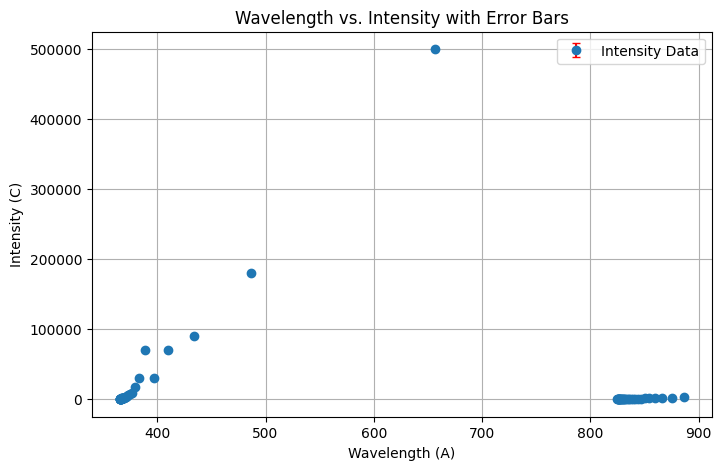

In [23]:
plot_wavelength_intensity(df_cleaned_na_NIST["obs_wl_air(nm)"], df_cleaned_na_NIST["intens"], df_cleaned_na_NIST["unc_obs_wl"])